In [1]:
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.io.wavfile as audio

## Exercice 1. (Filtrage de signaux 1D)

In [203]:
N = 512

In [205]:
t = np.linspace(0, 1, N)
u = signal.sawtooth(2 * np.pi * 5 * t)

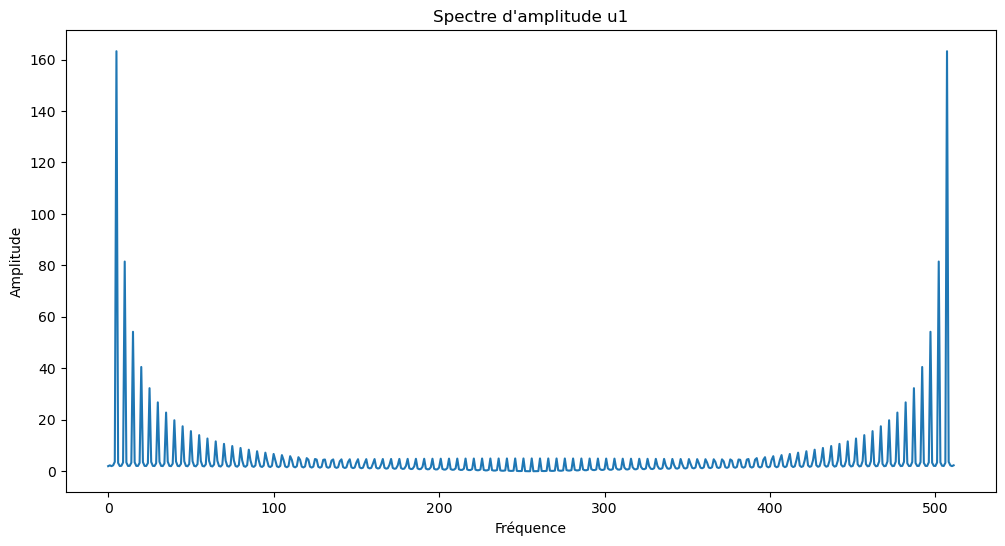

In [10]:
u_fft = fft(u)
sp_amp_u = np.abs(u_fft)

plt.figure(figsize=(12, 6))
plt.plot (sp_amp_u)
plt.title("Spectre d'amplitude u1")
plt.xlabel("Fréquence")
plt.ylabel("Amplitude");

In [151]:
h1 = np.zeros(512)
h1[1] = 1

h0 = np.zeros(512)
h0[0] = 1

h = h1-h0

h_fft = fft(h)

In [175]:
H1 = ifft(u_fft * h_fft)

In [143]:
H2 = np.convolve(u, h, mode='same')

In [297]:
# plt.figure(figsize=(12, 6))
# plt.plot(H2)
# plt.title("Filtrage de u")
# plt.xlabel("Fréquence")
# plt.ylabel("Valeurs");

In [299]:
u_filt = np.zeros(512)

for i in range(512):
    for k in range(512):
        u_filt[i] += h[k]*u[i-k]

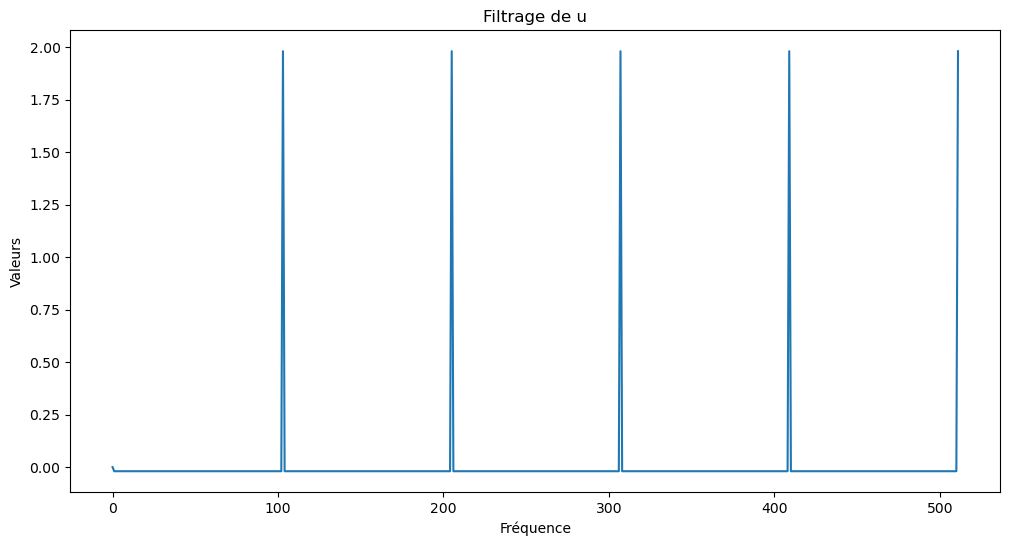

In [167]:
plt.figure(figsize=(12, 6))
plt.plot(u_filt)
plt.title("Filtrage de u")
plt.xlabel("Fréquence")
plt.ylabel("Valeurs");

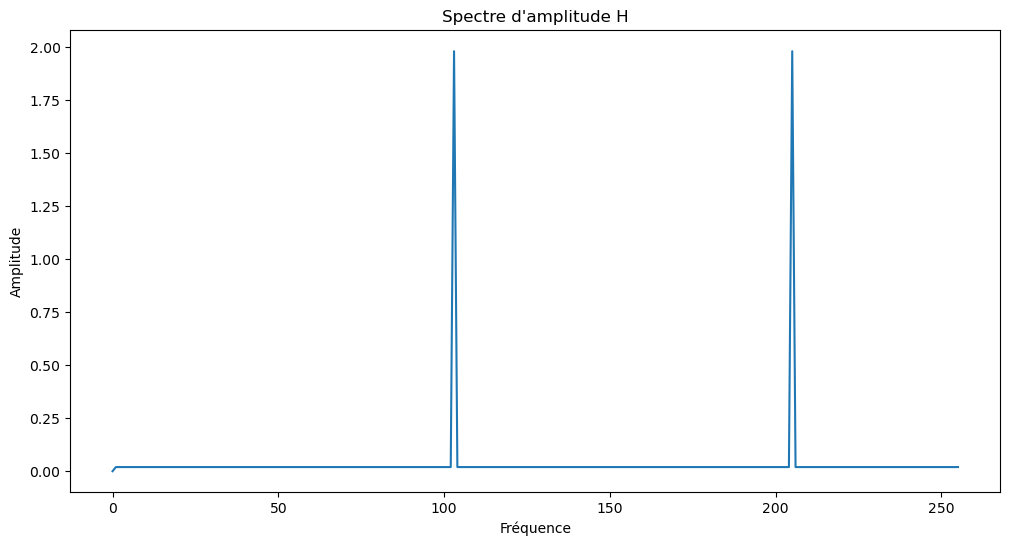

In [197]:
sp_amp_H = np.abs(u_filt)
plt.figure(figsize=(12, 6))
plt.plot (sp_amp_H[:256])
plt.title("Spectre d'amplitude H")
plt.xlabel("Fréquence")
plt.ylabel("Amplitude");

In [161]:
h2 = np.zeros(512)
h2[2] = 1

h_new = h2 - 2*h1 + h0

In [185]:
u_filt_2 = np.zeros(512)

for i in range(512):
    for k in range(512):
        u_filt_2[i] += h_new[k]*u[i-k]

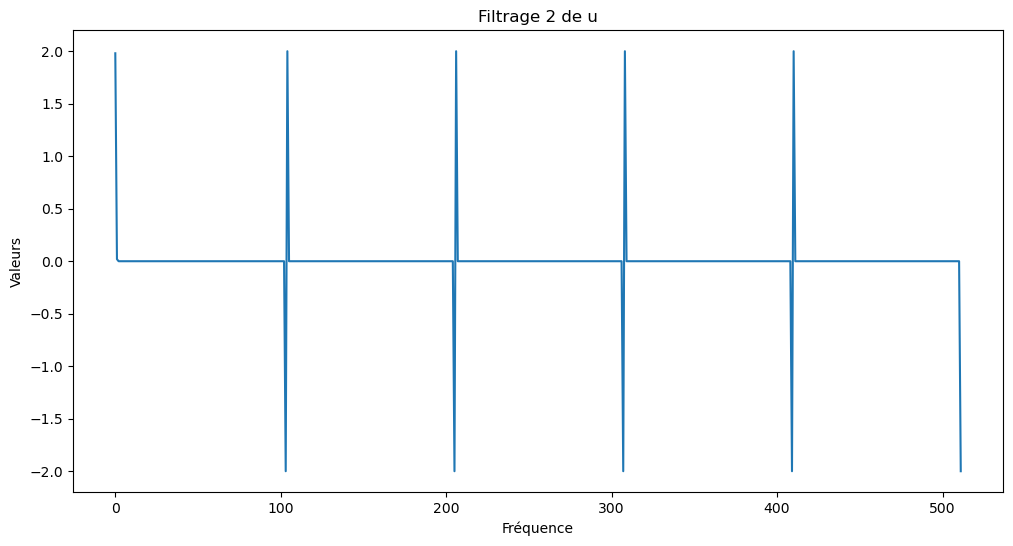

In [189]:
plt.figure(figsize=(12, 6))
plt.plot(u_filt_2)
plt.title("Filtrage 2 de u")
plt.xlabel("Fréquence")
plt.ylabel("Valeurs");

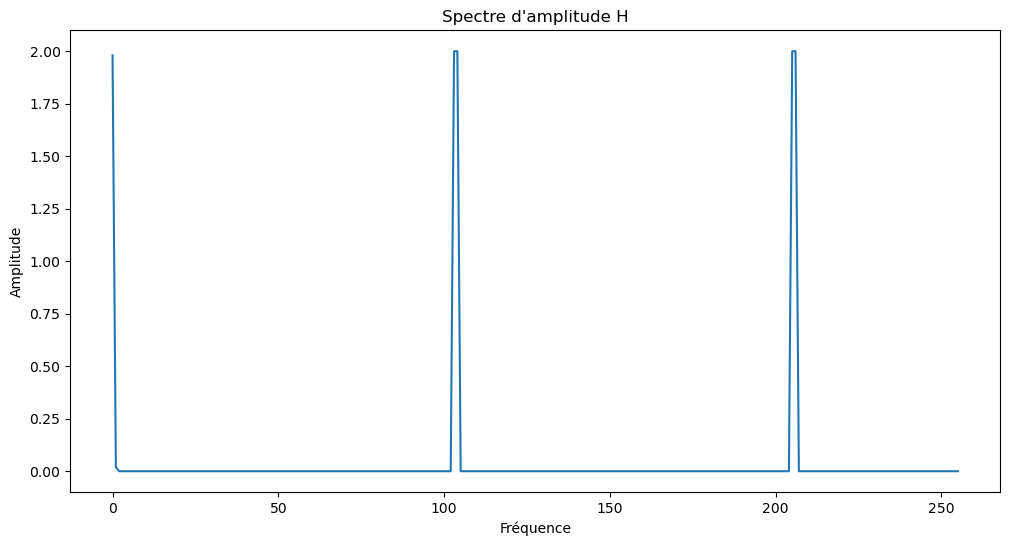

In [277]:
sp_amp_H_2 = np.abs(u_filt_2)
plt.figure(figsize=(12, 6))
plt.plot (sp_amp_H_2[:256])
plt.title("Spectre d'amplitude H")
plt.xlabel("Fréquence")
plt.ylabel("Amplitude");

In [315]:
g = np.zeros(N)
x = np.arange(0, N/2, dtype = int)
s_car = np.std(x)**2
g[x] = np.exp(-x**2/(2*s_car))
g[256:N] = np.flip(g[x])
g = g/sum(g)

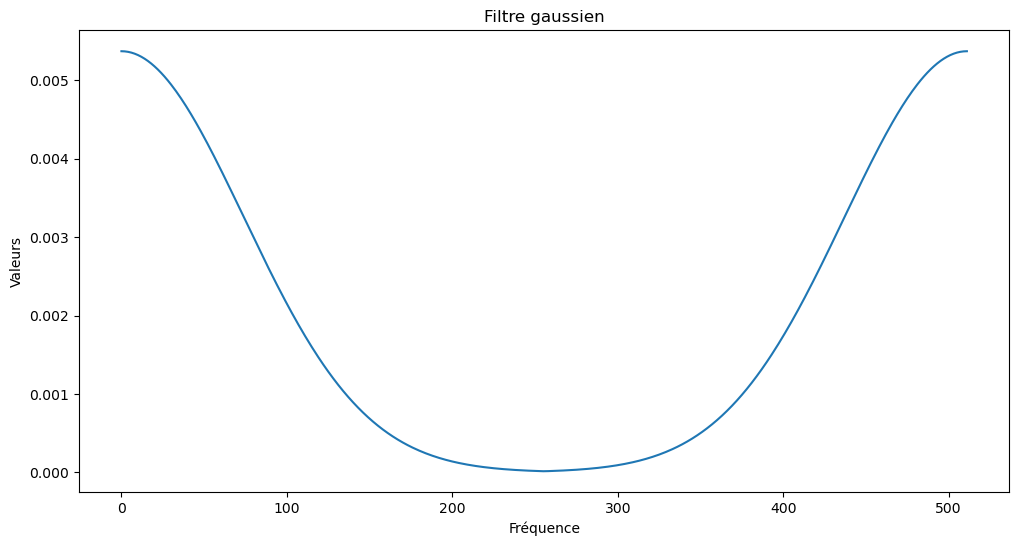

In [291]:
plt.figure(figsize=(12, 6))
plt.plot(g)
plt.title("Filtre gaussien")
plt.xlabel("Fréquence")
plt.ylabel("Valeurs");

In [271]:
u_filt_3 = np.zeros(512)

for i in range(512):
    for k in range(512):
        u_filt_3[i] += g[k]*u[i-k]

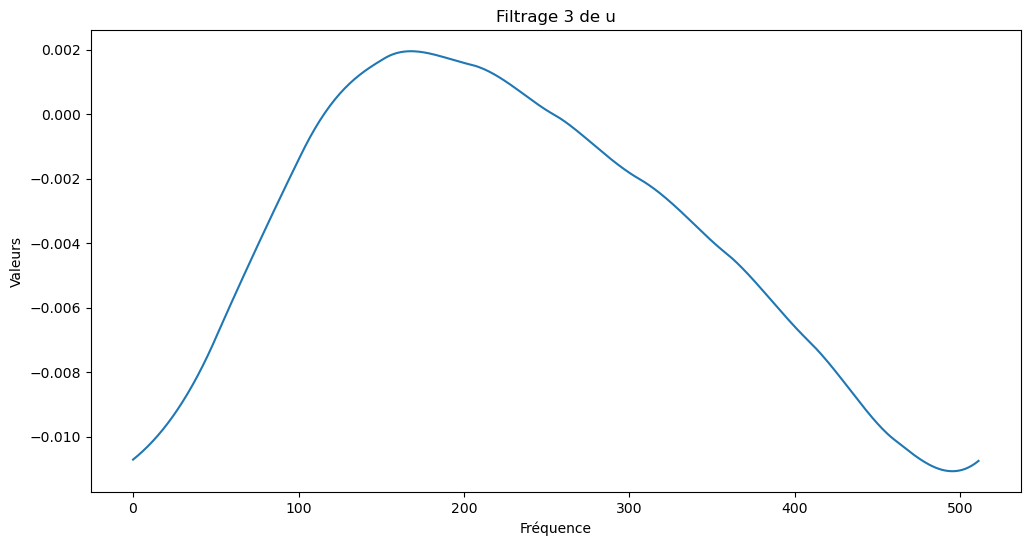

In [309]:
plt.figure(figsize=(12, 6))
plt.plot(u_filt_3)
plt.title("Filtrage 3 de u")
plt.xlabel("Fréquence")
plt.ylabel("Valeurs");

In [ ]:
v = u - u_filt_3

In [311]:
# sp_amp_H_3 = np.abs(u_filt_3)
# plt.figure(figsize=(12, 6))
# plt.plot (sp_amp_H_3[:256])
# plt.title("Spectre d'amplitude H")
# plt.xlabel("Fréquence")
# plt.ylabel("Amplitude");